<a href="https://colab.research.google.com/github/mefrem/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module2-loadingdata/LS_DS_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

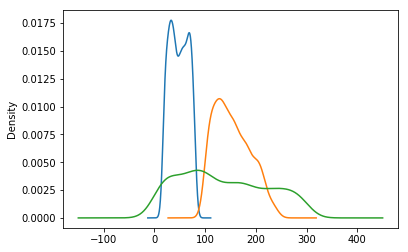

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

persons_url = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv'
persons = pd.read_csv(persons_url)
# persons.describe()
persons.age.plot.density(); #blue
persons.weight.plot.density(); #orange
persons.exercise_time.plot.density(); #green
# persons.head()


In [0]:
# Based on the kernal density charts of each variable, I think the data can be binned into thirds or seconds and still retain salient features
age_bins = pd.cut(persons.age, 2)
weight_bins = pd.cut(persons.weight, 3)
exercise_time_bins = pd.cut(persons.exercise_time, 2)

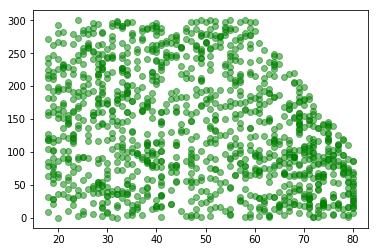

In [70]:
plt.scatter(persons.age,persons.exercise_time, c='green', alpha=.5);

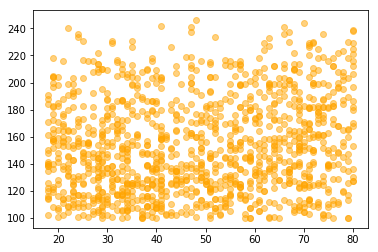

In [82]:
plt.scatter(persons.age,persons.weight, c='orange',alpha=.5)

In [0]:
!pip install pandas==0.23.4

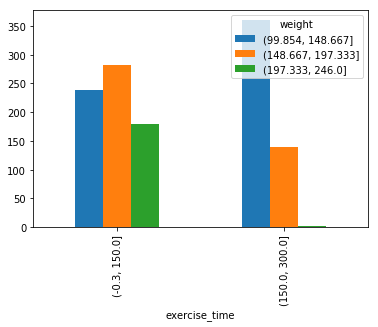

In [41]:
# Binning data for crosstabulation
crosstab = pd.crosstab(exercise_time_bins, weight_bins)
crosstab
crosstab.plot(kind='bar');
# Look! There are no "overweight" (green) people in the top 50% of the population by exercise

In [83]:
# Trying simple regression, exercise time on weight

feature = persons.exercise_time
target = persons.weight
model = LinearRegression()
model.fit(np.asarray(feature).reshape(-1,1),target)
model.coef_
# exercising 1 minute more is associated with .2 less lbs in weight

array([-0.196308])

In [80]:
# Trying simple regression, age on weight

feature = persons.age
target = persons.weight
model = LinearRegression()
model.fit(np.asarray(feature).reshape(-1,1),target)
model.coef_
# aging 1 year is associated with .3 lb weight gain

array([0.27880213])

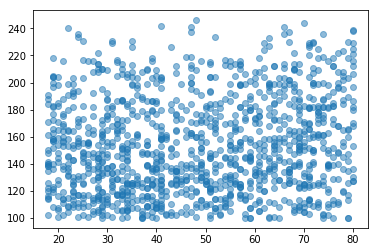

In [81]:
# A scatter of age and weight
plt.scatter(persons.age,persons.weight, alpha=.5);


### Preliminary Thoughts
#### Exercise Time

Exercise time greatly influences weight. For example, no one in the top 50% of exercise time is in the top third of the population by weight. Furthermore, a simple regression shows that every minute of weekly exercise decreases weight by about .2 lbs. That means our 5 hour exercisers can expect to weight 50 lb less than the baseline.


In [0]:
# persons.plot.scatter('age','exercise_time');
# persons.plot.scatter('age','weight');

model = LinearRegression()

features = [persons['age'],persons['exercise_time']]
target = persons['weight']

model.fit(np.asarray(persons['age']).reshape(-1,1),target)
predictions = model.predict(persons['age'])
persons.plot.scatter(x=persons.age, y=persons.weight, s=50)
plt.plot(range(1200),predictions)

In [85]:
# Multiple regression, age and exercise time on weight

import statsmodels.api as sm

X = persons[['age','exercise_time']] # here we have 2 variables for multiple regression.
Y = persons['weight']
 
# with sklearn
regr = LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 178.463777274025
Coefficients: 
 [ 0.02775775 -0.19469398]


### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?

The variables--age, weight, and exercise_time--are interelated descriptions of individuals. No single variable is the dependent variable, as they can each inform the other. For the sake of initially studying the data, I investigated the relationship of age and exercise time on weight. As for the data themselves, the variables are logged as integers. However they are continuous in the sense that there are more than 30 or so ordered instances for each variable.

2.  What are the relationships between the variables?

**Exercise and Weight**

What stands out the most is the relationship between exercise and weight. If you split the population in half by exercise time, none of the top 50% of exercisers are in the top third of the population by weight. 

**Age and Weight**

The relationship between age and weight was that after an individual reaches their early twenties and gets older (where they see a rapid rise in weight), they tend to lose weight. 

**Age and Exercise**

An individual's propensity to exercise is highest in the first third and the last third of the population ranked by age. Younger people exercise more, middle age they don't, and then the tendency picks up again.


3.  Which relationships are "real", and which spurious?

The relationship between exercise and weight has a plausible explanation as well as data to back it. The more one exercises, the less they tend to weigh. A more spurious relationship would be that between exercise time and age. The more you exercise, the higher your age? That seems absurd on its face.


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)